# 1. 2025년 10월 1일~10일 SNS_COMMUNITY DATA ANALYSIS

## (1) SNS 데이터 워드클라우드

### A. 필요 라이브러리 임포트

In [3]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

### B. 데이터 로드 및 필터링

In [4]:
# 데이터 로드
df = pd.read_csv('./FINAL_SNS_YOUTUBE.csv', encoding='utf-8-sig')

print(f"전체 데이터: {len(df):,}행")
print(f"날짜 범위: {df['date'].min()} ~ {df['date'].max()}")
print(f"\n컬럼: {df.columns.tolist()}")

전체 데이터: 6,382행
날짜 범위: 20250901 ~ 20251031

컬럼: ['date', 'platform', 'type', 'content', 'engagement', 'author', 'url', 'original_date', 'id']


In [23]:
# 2025년 10월 1일~09일 데이터 필터링
start_date = 20250901
end_date = 20251130
df_oct5 = df[(df['date'] >= start_date) & (df['date'] <= end_date)].copy()

print(f"\n{'='*100}")
print(f"2025년 9월 1일~11월30일 SNS데이터")
print(f"{'='*100}")
print(f"SNS데이터수: {len(df_oct5):,}개")
print(f"\n샘플데이터:")
for i, content in enumerate(df_oct5['content'], 1):
    print(f"{i:2d}. {content}")


2025년 9월 1일~11월30일 SNS데이터
SNS데이터수: 6,382개

샘플데이터:
 1. Why I Sold 500000 Of Bitcoin BTC Crypto Crash Analysis
 2. Everyone is panic selling but you39re buying the dip Magic No its our Market breathing indicator nailing the bottom on GAS coin Time after time it finds the perfect entry points right before
 3. This dude is a different kind of special Shows 120 day SMA and you clearly see the whole bull run it dips below many many times just to shoot above it higher Ill bet you 1 BTC that we are back above and heading back to ATH by October 1st
 4. Everyone falling for the September scare see you higher in price very soon
 5. Theres a solid chance you just sold near the bottom of the correction
 6. Great video I also noticed the long term holders seemed to be selling recently which also looks like a possible warning sign
 7. Never sell ur Bitcoin do dollarcostaverage instead
 8. never sell your bitcoin
 9. So when BTC goes below the 120 you sell ALL of your BTC or take profits out
10. Runn

In [24]:
# 모든 content를 하나의 문자열로 결합
all_content = ' '.join(df_oct5['content'].dropna().astype(str))

print(f"전체 텍스트 길이: {len(all_content):,}자")
print(f"\n전체 텍스트 샘플 (처음 500자):")
print(all_content[:500])

전체 텍스트 길이: 640,475자

전체 텍스트 샘플 (처음 500자):
Why I Sold 500000 Of Bitcoin BTC Crypto Crash Analysis Everyone is panic selling but you39re buying the dip Magic No its our Market breathing indicator nailing the bottom on GAS coin Time after time it finds the perfect entry points right before This dude is a different kind of special Shows 120 day SMA and you clearly see the whole bull run it dips below many many times just to shoot above it higher Ill bet you 1 BTC that we are back above and heading back to ATH by October 1st Everyone falling


### C. 단어 추출 및 정제(불용어 처리 등)

In [43]:
# 단어 추출 및 정제
# 영문 단어만 추출 (최소 3글자 이상)
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# 필수 리소스 다운로드 (이미 했으면 생략 가능)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# 1. 단어 추출 (소문자 변환 후 정규식)
# all_content가 정의되어 있다고 가정
words = re.findall(r'\b[a-z]{3,}\b', all_content.lower())

# 2. 강력한 불용어 사전 구축
# NLTK 제공 기본 불용어 (i, me, my, myself, we, our... 등 수백 개 포함)
stop_words = set(stopwords.words('english'))

# 사용자 정의 불용어 (오타 수정 및 확장)
custom_stops = {
    'warpup', 'wrapup', 'wrap', 'tha', 'die', 'free', 'ath', 'anything', 'ive', 'ein',
    'news', 'report', 'reports', 'reported', 'reporting', 'goes', 'post', 'comment', 'come',
    'analysis', 'analyst', 'analysts', 'von', 'ein', 'auch', 'learn', 'already', 'mit', 'talk', 'kiya', 'since',
    'better', 'early', 'ago', 'ein', 'auch', 'car', 'please', 'anyone', 'wbeth', 'ath', 'ein', 'ago', 'von', 'ada',
    'aber', 'kar', 'put', 'around', 'dann', 'win', 'start', 'per', 'ath', 'fund', 'noch', 'car', 'since', 'sold',
    'chart', 'gone', 'comment', 'goes', 'red', 'bag', 'wbeth crash', 'share', 'experience', 'back', 'dan',
    'say', 'says', 'said', 'saying', 'according',
    'amid', 'update', 'updates', 'latest', 'personal', 'keep', 'let', 'come', 'show', 'gonna', 'lot',
    'today', 'yesterday', 'tomorrow', 'thing', 'didnt', 'actually', 'free', 'hat', 'car', 'wenn', 'tha',
    'time', 'year', 'years', 'week', 'weeks', 'day', 'days', 'month', 'months',
    'people', 'investor', 'investors', 'trader', 'traders',
    'good', 'bad', 'new', 'old', 'great',
    'much', 'many', 'high', 'low', 'big', 'small',
    'million', 'billion',
    'hit', 'hits', 'rise', 'rises', 'rising', 'rose', 'personal',
    'fall', 'falls', 'falling', 'fell', 'tha', 'mai', 'lot', 'nahi', 'show', 'tha', 'love', 'den',
    'kya', 'bhi', 'auf', 'ich', 'lol', 'believe','yes', 'give', 'follow', 'live', 'hat', 'nur', 'eth', 'way',
    'list', 'key', 'list key', 'den', 'alle', 'data', 'fast', 'que', 'give', 'aur', 'yes', 'reason'
    'surge', 'surges', 'surging',
    'drop', 'drops', 'dropping',
    'bitcoin', 'btc', 'crypto', 'cryptocurrency', 'reaction',
    'price', 'prices', 'pricing',
    'market', 'markets',
    'stock', 'stocks',
    'ethereum', 'xrp', 'gold', 'video', 'like', 'video', 'best', 'love', 'aber', 'gonna', 'die', 'den',
    'etf', 'etfs',
    'mining', 'miner', 'bhai', 'nothing', 'gonna', 'ive', 'feel', 'work', 'invest', 'play', 'still',
    'record', 'rally', 'ist', 'whats', 'mein', 'account', 'right', 'und', 'der', 'best', 'well', 'bei',
    'video', 'channel', 'subscribe', 'link',
    'thank', 'thanks', 'yet', 'thing', 'coin', 'real', 'bro', 'might', 'feel', 'cycle', 'life', 'spot', 'wie',
    'got', 'get', 'getting', 'binance', 'money', 'daily', 'sir', 'let', 'man', 'tell', 'das', 'youre', 'you',
    'now', 'one', 'use', 'make', 'see', 'look', 'watch', 'every'
    'like', 'know', 'think', 'going', 'would', 'could', 'should', 'hai', 'community', 'never', 'dont'
}

# 두 집합 합치기
stop_words.update(custom_stops)

# 3. 표제어 추출기(Lemmatizer) 준비
lemmatizer = WordNetLemmatizer()

# 4. 필터링 로직 개선 (핵심!)
# 단어를 원형으로 바꾼 뒤(lemmatize), 그 원형이 불용어 리스트에 있는지 확인합니다.
filtered_words = [
    word for word in words 
    if word not in stop_words  # 1차: 단어 그대로 확인
    and lemmatizer.lemmatize(word) not in stop_words # 2차: 원형으로 바꿔서 확인 (investors -> investor)
    and lemmatizer.lemmatize(word, pos='v') not in stop_words # 3차: 동사 원형 확인 (reported -> report)
]

print(f"------------ 결과 확인 ------------")
print(f"추출된 단어 수 (전): {len(words):,}개")
print(f"추출된 단어 수 (후): {len(filtered_words):,}개")
print(f"제거된 단어 수: {len(words) - len(filtered_words):,}개")
print(f"고유 단어 수: {len(set(filtered_words)):,}개")

# 상위 단어 확인해서 여전히 쓰레기 단어가 있는지 체크
from collections import Counter
print("\n[최종 상위 20개 단어]")
print(Counter(filtered_words).most_common(20))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


------------ 결과 확인 ------------
추출된 단어 수 (전): 88,634개
추출된 단어 수 (후): 47,245개
제거된 단어 수: 41,389개
고유 단어 수: 11,767개

[최종 상위 20개 단어]
[('crash', 948), ('october', 691), ('discussion', 390), ('trump', 344), ('technical', 303), ('buy', 287), ('breakdown', 281), ('liquidation', 272), ('trading', 238), ('whale', 233), ('manipulation', 222), ('leverage', 211), ('sell', 187), ('even', 158), ('short', 139), ('liquidated', 136), ('always', 131), ('trade', 121), ('warning', 115), ('long', 114)]


In [44]:
# 단어 빈도 계산
word_counts = Counter(filtered_words)

print(f"\n{'='*60}")
print("상위 30개 단어")
print(f"{'='*60}")
for i, (word, count) in enumerate(word_counts.most_common(30), 1):
    print(f"{i:2d}. {word:20s} : {count:3d}회")


상위 30개 단어
 1. crash                : 948회
 2. october              : 691회
 3. discussion           : 390회
 4. trump                : 344회
 5. technical            : 303회
 6. buy                  : 287회
 7. breakdown            : 281회
 8. liquidation          : 272회
 9. trading              : 238회
10. whale                : 233회
11. manipulation         : 222회
12. leverage             : 211회
13. sell                 : 187회
14. even                 : 158회
15. short                : 139회
16. liquidated           : 136회
17. always               : 131회
18. trade                : 121회
19. warning              : 115회
20. long                 : 114회
21. exchange             : 114회
22. profit               : 113회
23. loss                 : 111회
24. buying               : 107회
25. next                 : 107회
26. last                 : 105회
27. every                : 104회
28. lost                 : 103회
29. run                  : 102회
30. dump                 : 102회


### D. 워드클라우드 생성

✓ 워드클라우드 저장 완료: ./wordcloud_analysis/wordcloud_20250901_20251130.png


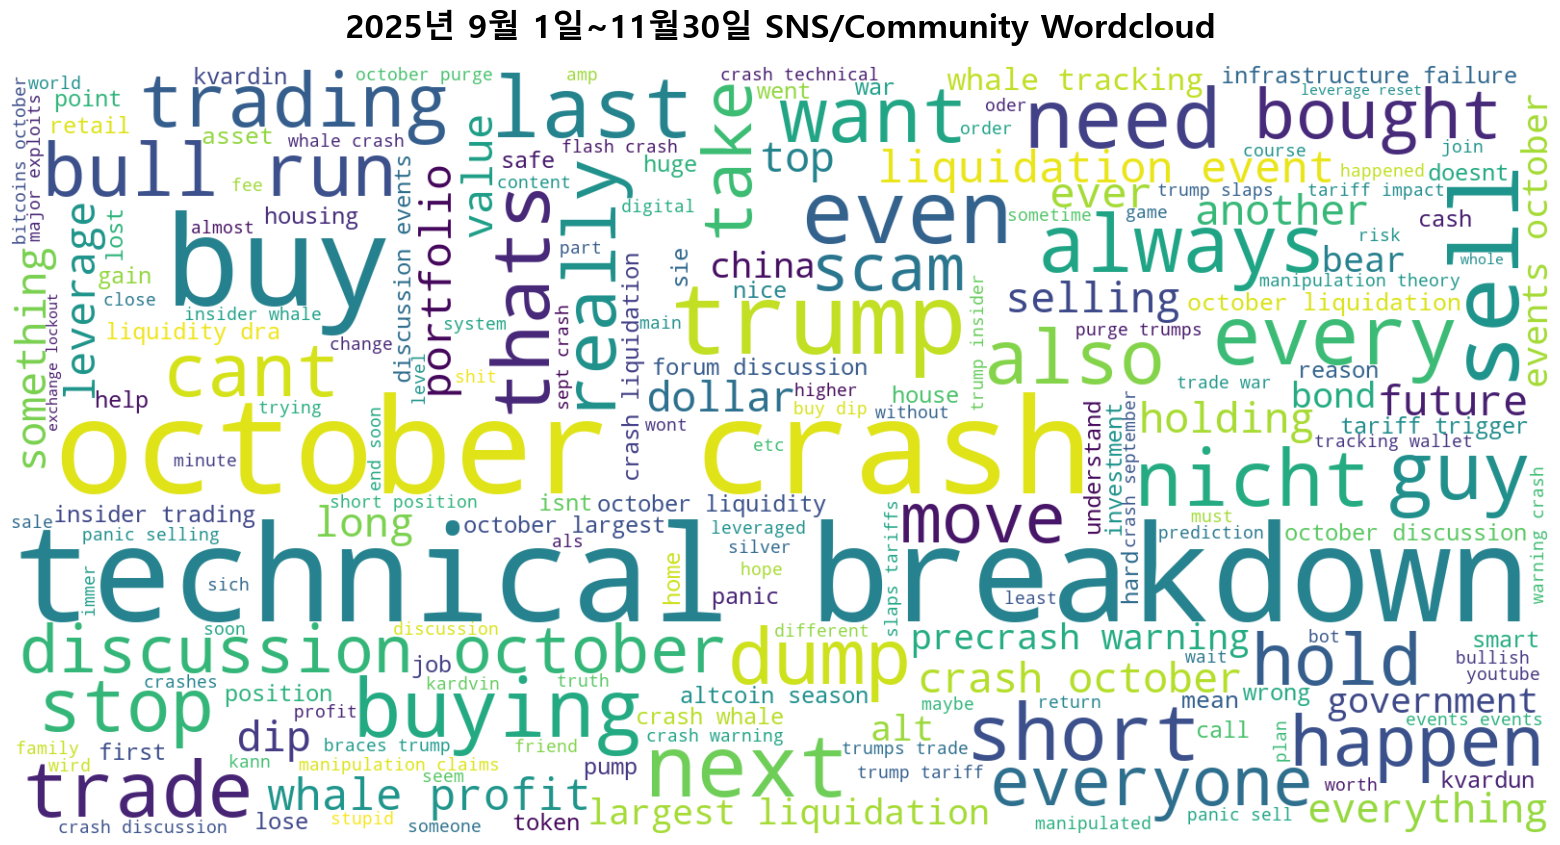

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import os

# 1. 불용어 설정
my_stop_words = set(stopwords.words('english'))

if 'custom_stops' in locals():
    my_stop_words.update(custom_stops)

# 2. 워드클라우드 생성
wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    colormap='viridis',
    relative_scaling=0.5,
    min_font_size=10,
    max_words=200,
    stopwords=my_stop_words 
).generate(' '.join(filtered_words)) # filtered_words 리스트 사용

# 3. 시각화 설정
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('2025년 9월 1일~11월30일 SNS/Community Wordcloud', 
          fontsize=24, fontweight='bold', pad=20)

os.makedirs('./wordcloud_analysis', exist_ok=True) 

output_path = './wordcloud_analysis/wordcloud_20250901_20251130.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"✓ 워드클라우드 저장 완료: {output_path}")

# 5. 화면 출력
plt.show()